### Importing the required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

Assigning the page address to the url 

In [2]:
#url to scrap the data
url = 'https://www.swiggy.com/city/hyderabad'

In [3]:
page = requests.get(url)

Checking the status code of the page

In [4]:
page.status_code

200

Printing the content of the page

In [5]:
pagecontent = page.text

In [6]:
# pagecontent

### Web Scrapping

In [7]:
soup = BeautifulSoup(pagecontent)

In [8]:
list1 = soup.find_all("div",class_='_1HEuF')

In [9]:
name = soup.find_all('div',attrs={'class':'nA6kb'})
name

[<div class="nA6kb">Vasista's Sri Lakshmi</div>,
 <div class="nA6kb">Box9</div>,
 <div class="nA6kb">BURGER NINE</div>,
 <div class="nA6kb">Hitech Bawarchi</div>,
 <div class="nA6kb">KS Bakers</div>,
 <div class="nA6kb">SAI RAM MESS</div>,
 <div class="nA6kb">Rice Bowl</div>,
 <div class="nA6kb">Karachi cafe</div>,
 <div class="nA6kb">Leon's - Burgers &amp; Wings (Leon Grill)</div>,
 <div class="nA6kb">The Thali Zone</div>,
 <div class="nA6kb">Dostea</div>,
 <div class="nA6kb">Kolkata House</div>,
 <div class="nA6kb">Millet Express</div>,
 <div class="nA6kb">D'SWADH</div>,
 <div class="nA6kb">Soul Rasa</div>,
 <div class="nA6kb">Protein Chef</div>]

In [10]:
for i in list1:
    name=i.find('div',class_='nA6kb')
    print(name.text)   

Vasista's Sri Lakshmi
Box9
BURGER NINE
Hitech Bawarchi
KS Bakers
SAI RAM MESS
Rice Bowl
Karachi cafe
Leon's - Burgers & Wings (Leon Grill)
The Thali Zone
Dostea
Kolkata House
Millet Express
D'SWADH
Soul Rasa
Protein Chef


In [11]:
#This should be in a seperate function


name_list= [] 
cuisine_list= []
green_rating_list = []
orange_rating_list= []
avg_price_two_list= []
coupon_code_list= []

for i in range(1,32):
    url = 'https://swiggy.com/city/hyderabad?page='+str(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    list1 = soup.find_all('div',class_='_1HEuF')
    
    for j in list1:
        
        name = j.find('div',class_='nA6kb')
        if name is None:
            name_list.append(np.NaN)
        else:
            name_list.append(name.text)
            
        cuisine = j.find('div',class_='_1gURR')
        if cuisine is None:
            cusine_list.append(np.NaN)
        else:
            cuisine_list.append(cuisine.text)
            
        rating_green=j.find('div',class_='_9uwBC wY0my')
        if rating_green is None:
            green_rating_list.append(np.NaN)
        else:
            green_rating_list.append(rating_green.text)
        
        rating_orange=j.find('div',class_='_9uwBC _2lAlc')
        if rating_orange is None:
            orange_rating_list.append(np.NaN)
        else:
            orange_rating_list.append(rating_orange.text)
        
        avg_price_two=j.find('div',class_='nVWSi')
        if avg_price_two is None:
            avg_price_two_list.append(np.NaN)
        else:
            avg_price_two_list.append(avg_price_two.text)
        
        coupon_code=j.find('span',class_='sNAfh')
        if coupon_code is None:
            coupon_code_list.append(np.NaN)
        else:
            coupon_code_list.append(coupon_code.text)      

In [12]:
len(name_list)

496

In [13]:
len(cuisine_list)

496

In [14]:
len(green_rating_list)

496

In [15]:
len(orange_rating_list)

496

In [16]:
len(avg_price_two_list)

496

In [17]:
len(coupon_code_list)

496

In [18]:
swiggy=pd.DataFrame({'restaurant_name':name_list,'cuisine':cuisine_list,'green_rating':green_rating_list,
                     'orange_rating':orange_rating_list,'average_price':avg_price_two_list,'coupon_code':coupon_code_list})

In [19]:
swiggy.head(10)

,restaurant_name,cuisine,green_rating,orange_rating,average_price,coupon_code
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,₹350 FOR TWO,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,₹300 FOR TWO,50% off | Use WELCOME50
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.7,₹300 FOR TWO,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,₹600 FOR TWO,50% off | Use WELCOME50
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,₹300 FOR TWO,50% off | Use WELCOME50
5,Rice Bowl,"North Indian, South Indian",4.0,NaN,₹200 FOR TWO,50% off | Use WELCOME50
6,Lucky Multicuisine Restaurant,"Indian, Chinese, Tandoor",NaN,3.5,₹300 FOR TWO,50% off | Use WELCOME50
7,Kakatiya Mess,"Andhra, Biryani",4.3,NaN,₹400 FOR TWO,50% off | Use WELCOME50
8,Leon's - Burgers & Wings (Leon Grill),"American, Snacks, Turkish, Portuguese, Contine...",4.2,NaN,₹300 FOR TWO,50% off | Use WELCOME50
9,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",NaN,3.9,₹300 FOR TWO,50% off | Use WELCOME50


In [20]:
swiggy.tail(10)

,restaurant_name,cuisine,green_rating,orange_rating,average_price,coupon_code
486,Yummy Bee - Low Calorie Desserts,Bakery,4.4,NaN,₹500 FOR TWO,20% off on all orders
487,Itminaan Matka Biryani - Slow Cooked,"Biryani, North Indian, Mughlai",4.0,NaN,₹250 FOR TWO,50% off | Use WELCOME50
488,Qaffeine Coffee,"Beverages, Desserts, Snacks",NaN,3.8,₹400 FOR TWO,50% off | Use WELCOME50
489,Wow Chow,"Chinese, Asian",NaN,NaN,₹500 FOR TWO,Flat ₹125 off on orders above ₹249
490,Cafe Cupz,"Italian, Continental, Beverages",NaN,NaN,₹200 FOR TWO,50% off | Use WELCOME50
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,₹200 FOR TWO,50% off | Use WELCOME50
492,Bangaram tiffin center,South Indian,NaN,NaN,₹250 FOR TWO,50% off | Use WELCOME50
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,₹80 FOR TWO,50% off | Use WELCOME50
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,₹250 FOR TWO,50% off | Use WELCOME50
495,Waves,Indian,NaN,NaN,₹450 FOR TWO,50% off | Use WELCOME50


### Data Cleaning

In [21]:
#There are total 19 duplicate columns.
swiggy.duplicated().sum()

19

In [22]:
#analysing duplicate data
swiggy[swiggy.duplicated()==False].count()

restaurant_name    477
cuisine            477
green_rating       247
orange_rating      182
average_price      477
coupon_code        477
dtype: int64

In [23]:
#dropping duplicate data
swiggy.drop_duplicates(inplace=True)

In [24]:
swiggy.duplicated().sum()

0

In [25]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 495
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  477 non-null    object
 1   cuisine          477 non-null    object
 2   green_rating     247 non-null    object
 3   orange_rating    182 non-null    object
 4   average_price    477 non-null    object
 5   coupon_code      477 non-null    object
dtypes: object(6)
memory usage: 26.1+ KB


In [26]:
df = swiggy['average_price'].str.split(' ',n=1,expand=True)

In [27]:
df = swiggy['average_price'].str.split('₹',n=1,expand=True)

In [28]:
data = df[1].str.split(' ',n=1,expand=True)

In [29]:
swiggy.insert(loc=5, column='price_per_two', value=data[0])

In [30]:
df_1 = swiggy.drop(['average_price'],axis=1)
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,350,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off | Use WELCOME50
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.7,300,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,600,50% off | Use WELCOME50
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,300,50% off | Use WELCOME50
...,...,...,...,...,...,...
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,200,50% off | Use WELCOME50
492,Bangaram tiffin center,South Indian,NaN,NaN,250,50% off | Use WELCOME50
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,80,50% off | Use WELCOME50
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,250,50% off | Use WELCOME50


In [31]:
df_2 = swiggy['coupon_code'].str.split('|',n=1,expand=True)
df_2

,0,1
0,50% off,Use WELCOME50
1,50% off,Use WELCOME50
2,50% off,Use WELCOME50
3,50% off,Use WELCOME50
4,50% off,Use WELCOME50
...,...,...
491,50% off,Use WELCOME50
492,50% off,Use WELCOME50
493,50% off,Use WELCOME50
494,50% off,Use WELCOME50


In [32]:
df_3 = df_2.replace(to_replace=["FREE DELIVERY"],value="0% off")
df_3

,0,1
0,50% off,Use WELCOME50
1,50% off,Use WELCOME50
2,50% off,Use WELCOME50
3,50% off,Use WELCOME50
4,50% off,Use WELCOME50
...,...,...
491,50% off,Use WELCOME50
492,50% off,Use WELCOME50
493,50% off,Use WELCOME50
494,50% off,Use WELCOME50


In [33]:
df_1.insert(loc=5, column='Discount', value=df_3[0])
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,Discount,coupon_code
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,350,50% off,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off,50% off | Use WELCOME50
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.7,300,50% off,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,600,50% off,50% off | Use WELCOME50
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,300,50% off,50% off | Use WELCOME50
...,...,...,...,...,...,...,...
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,200,50% off,50% off | Use WELCOME50
492,Bangaram tiffin center,South Indian,NaN,NaN,250,50% off,50% off | Use WELCOME50
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,80,50% off,50% off | Use WELCOME50
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,250,50% off,50% off | Use WELCOME50


In [34]:
df_1.insert(loc=6,column='coupon',value=df_3[1])
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,Discount,coupon,coupon_code
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,350,50% off,Use WELCOME50,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off,Use WELCOME50,50% off | Use WELCOME50
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.7,300,50% off,Use WELCOME50,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,600,50% off,Use WELCOME50,50% off | Use WELCOME50
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,300,50% off,Use WELCOME50,50% off | Use WELCOME50
...,...,...,...,...,...,...,...,...
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,200,50% off,Use WELCOME50,50% off | Use WELCOME50
492,Bangaram tiffin center,South Indian,NaN,NaN,250,50% off,Use WELCOME50,50% off | Use WELCOME50
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,80,50% off,Use WELCOME50,50% off | Use WELCOME50
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,250,50% off,Use WELCOME50,50% off | Use WELCOME50


In [35]:
df_1.drop(['coupon_code'],axis=1,inplace=True)
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,Discount,coupon
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,350,50% off,Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off,Use WELCOME50
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.7,300,50% off,Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,600,50% off,Use WELCOME50
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,300,50% off,Use WELCOME50
...,...,...,...,...,...,...,...
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,200,50% off,Use WELCOME50
492,Bangaram tiffin center,South Indian,NaN,NaN,250,50% off,Use WELCOME50
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,80,50% off,Use WELCOME50
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,250,50% off,Use WELCOME50


In [36]:
df_5 = df_1['coupon'].str.split('Use',n=1,expand=True)
df_5

,0,1
0,,WELCOME50
1,,WELCOME50
2,,WELCOME50
3,,WELCOME50
4,,WELCOME50
...,...,...
491,,WELCOME50
492,,WELCOME50
493,,WELCOME50
494,,WELCOME50


In [37]:
df_1.insert(loc=5, column='coupon_code', value=df_5[1])
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount,coupon
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,350,WELCOME50,50% off,Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,WELCOME50,50% off,Use WELCOME50
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.7,300,WELCOME50,50% off,Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,600,WELCOME50,50% off,Use WELCOME50
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,300,WELCOME50,50% off,Use WELCOME50
...,...,...,...,...,...,...,...,...
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,200,WELCOME50,50% off,Use WELCOME50
492,Bangaram tiffin center,South Indian,NaN,NaN,250,WELCOME50,50% off,Use WELCOME50
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,80,WELCOME50,50% off,Use WELCOME50
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,250,WELCOME50,50% off,Use WELCOME50


In [38]:
df_1.drop(['coupon'],axis=1,inplace=True)
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,350,WELCOME50,50% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,WELCOME50,50% off
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.7,300,WELCOME50,50% off
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,600,WELCOME50,50% off
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,300,WELCOME50,50% off
...,...,...,...,...,...,...,...
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,200,WELCOME50,50% off
492,Bangaram tiffin center,South Indian,NaN,NaN,250,WELCOME50,50% off
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,80,WELCOME50,50% off
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,250,WELCOME50,50% off


In [39]:
df_1.tail()

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
491,Sri Siva Reddy Sweets & Chaat,Sweets,4.4,NaN,200,WELCOME50,50% off
492,Bangaram tiffin center,South Indian,NaN,NaN,250,WELCOME50,50% off
493,Heritage ice cream parlour,"Ice Cream, Desserts",NaN,NaN,80,WELCOME50,50% off
494,Deepak Edla's Kitchen,"North Indian, South Indian, Chinese",NaN,3.6,250,WELCOME50,50% off
495,Waves,Indian,NaN,NaN,450,WELCOME50,50% off


In [40]:
df_1['green_rating'].value_counts()

4.0    61
4.1    59
4.2    51
4.3    33
4.4    26
4.5     8
4.6     5
4.8     3
4.7     1
Name: green_rating, dtype: int64

In [41]:
df_1['green_rating'].fillna(value='4.0',inplace=True)

In [42]:
df_1.head()

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,NaN,350,WELCOME50,50% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,WELCOME50,50% off
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",4.0,3.7,300,WELCOME50,50% off
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,NaN,600,WELCOME50,50% off
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,NaN,300,WELCOME50,50% off


In [43]:
df_1.describe()

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
count,477,477,477,182,477,464,477
unique,475,321,9,10,32,9,15
top,The Brooklyn Creamery - Healthy Ice Cream,South Indian,4.0,3.9,300,WELCOME50,50% off
freq,2,17,291,48,110,405,414


In [44]:
df_1['orange_rating'].fillna(value='3.9',inplace=True)

In [45]:
df_1['price_per_two']=df_1['price_per_two'].astype(int)

In [46]:
df_1['green_rating']=df_1['green_rating'].astype(float)

In [47]:
df_1['orange_rating']=df_1['orange_rating'].astype(float)

In [48]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 495
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  477 non-null    object 
 1   cuisine          477 non-null    object 
 2   green_rating     477 non-null    float64
 3   orange_rating    477 non-null    float64
 4   price_per_two    477 non-null    int32  
 5   coupon_code      464 non-null    object 
 6   Discount         477 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 27.9+ KB


### Data Visualization

#### Uni Variate Analysis

In [49]:
cuisine_value = df_1.cuisine.value_counts().values

In [50]:
cuisine_names = df_1.cuisine.value_counts().index

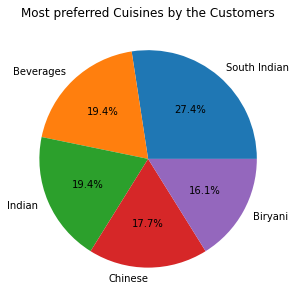

In [51]:
plt.figure(figsize=(5,5))
#explode=(0.2,0,0,0,0)
plt.pie(cuisine_value[:5],labels=cuisine_names[:5],autopct='%1.1f%%')
plt.title('Most preferred Cuisines by the Customers')
plt.show()

In [52]:
coupon_value = df_1.coupon_code.value_counts().values

In [53]:
coupon_names = df_1.coupon_code.value_counts().index

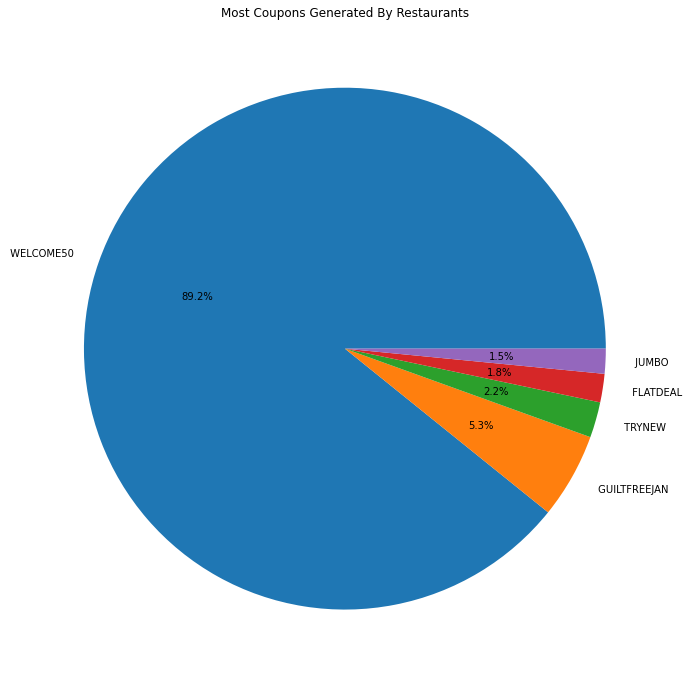

In [54]:
plt.figure(figsize=(12,12))
#explode=(0.2,0,0,0,0)
plt.pie(coupon_value[:5],labels=coupon_names[:5],autopct='%1.1f%%')
plt.title('Most Coupons Generated By Restaurants')
plt.show()

#### Bi Variate Analysis

In [55]:
df_1.nlargest(n=10,columns=['price_per_two'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
131,Theth Masala,"North Indian, Chinese, Continental",4.3,3.9,1000,WELCOME50,50% off
355,Mainland China,"Chinese, Asian",4.2,3.9,850,None,Flat ₹125 off on orders above ₹249
47,The Spicy Venue,"Biryani, Andhra, North Indian, Kebabs, Mughlai...",4.3,3.9,800,WELCOME50,50% off
198,BlueFox,"Biryani, North Indian, Chinese, Tandoor",4.1,3.9,800,WELCOME50,50% off
412,Oh! Calcutta,Indian,4.2,3.9,800,None,Flat ₹125 off on orders above ₹249
24,Kodi Kura Chitti Gaare,"Biryani, Andhra, Chinese, South Indian",4.0,3.9,750,WELCOME50,50% off
97,Almond House,"Sweets, Desserts, Snacks",4.6,3.9,750,WELCOME50,50% off
368,Concu,"Cafe, Continental, Beverages",4.5,3.9,750,WELCOME50,50% off
378,Art Of Dum,"Biryani, North Indian",4.2,3.9,750,WELCOME50,50% off
110,Biryani By Kilo,"Biryani, Hyderabadi, North Indian, Kebabs, Mug...",4.0,3.7,700,TRYNEW,50% off


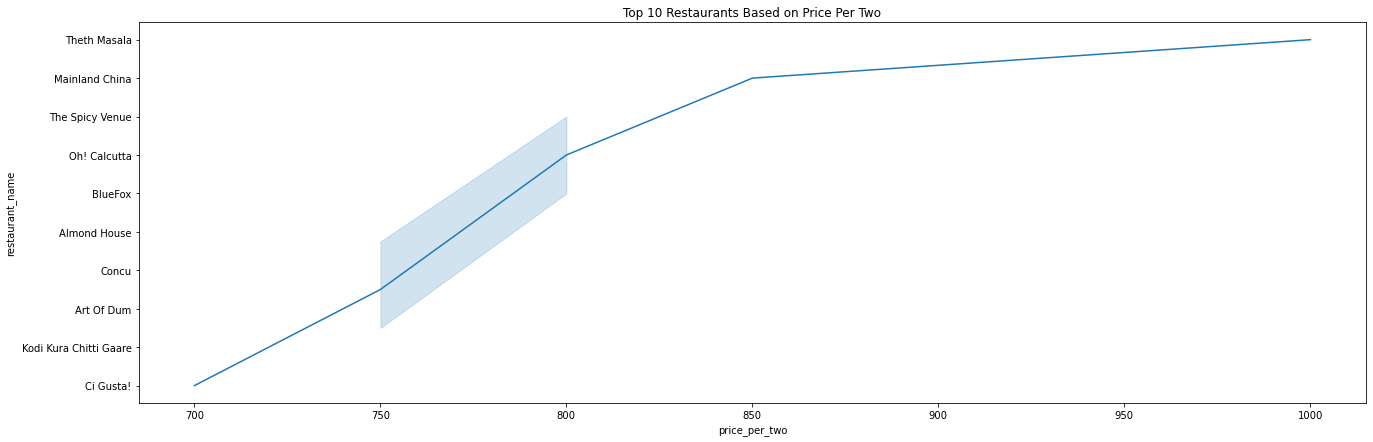

In [56]:
#costliest
plt.figure(figsize=(22,7))
sns.lineplot(x='price_per_two',y='restaurant_name',data=df_1.nlargest(n=10,columns=['price_per_two','green_rating']))
plt.title('Top 10 Restaurants Based on Price Per Two')
plt.show()

In [57]:
df_1.nsmallest(n=10,columns=['price_per_two'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
237,TEA TIME,Beverages,4.0,3.9,40,WELCOME50,50% off
493,Heritage ice cream parlour,"Ice Cream, Desserts",4.0,3.9,80,WELCOME50,50% off
158,The Juice Land,"Juices, Salads",4.0,3.9,100,WELCOME50,50% off
172,Dimmy's Pan Palace,"Chaat, Desserts, Juices",4.3,3.9,100,WELCOME50,50% off
220,BANGALORE BAKERS,Indian,4.0,3.9,100,WELCOME50,50% off
313,Cakelandia,Bakery,4.1,3.9,100,WELCOME50,50% off
336,Lo! - Low Carb and Keto Foods,"Healthy Food, Keto, North Indian, Continental",4.3,3.9,100,GUILTFREEJAN,40% off
387,Dostea,Beverages,4.6,3.9,100,WELCOME50,50% off
389,Great Indian Drinks (Goli Soda),"Beverages, Desserts, Snacks, Chaat, Juices",4.2,3.9,100,WELCOME50,50% off
413,Yard Bakery,"Bakery, Pizzas, Burgers, Desserts, Beverages, ...",4.0,3.7,100,WELCOME50,50% off


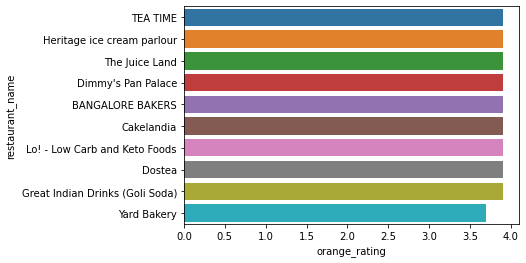

In [58]:
sns.barplot(x='orange_rating',y='restaurant_name',data=df_1.nsmallest(n=10,columns=['price_per_two']))
plt.show()

In [59]:
df_1.nlargest(n=10,columns=['green_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
324,Euphoria,"Desserts, Bakery",4.8,3.9,600,WELCOME50,50% off
393,Noodle Club,"Chinese, Fast Food",4.8,3.9,250,WELCOME50,50% off
411,Cake Boss,Bakery,4.8,3.9,400,WELCOME50,50% off
415,Sri Krishna Sweets,Sweets,4.7,3.9,200,WELCOME50,50% off
52,Natural Ice Cream,"Ice Cream, Desserts",4.6,3.9,150,WELCOME50,50% off
97,Almond House,"Sweets, Desserts, Snacks",4.6,3.9,750,WELCOME50,50% off
227,Kwality Walls Frozen Dessert and Ice Cream Shop,"Desserts, Ice Cream, Ice Cream Cakes",4.6,3.9,300,SWIGGYIT,20% off
264,Ibaco,Ice Cream,4.6,3.9,300,WELCOME50,50% off
387,Dostea,Beverages,4.6,3.9,100,WELCOME50,50% off
60,Vellanki Foods,Sweets,4.5,3.9,600,WELCOME50,50% off


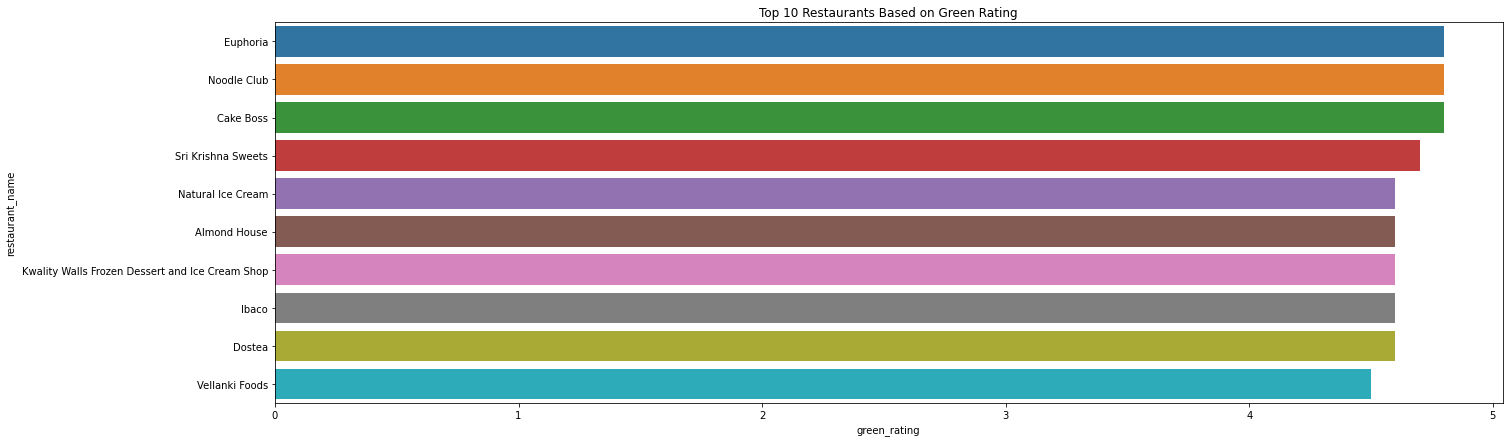

In [60]:
plt.figure(figsize=(22,7))
sns.barplot(x='green_rating',y='restaurant_name',data=df_1.nlargest(n=10,columns=['green_rating']),orient='h')
plt.title('Top 10 Restaurants Based on Green Rating')
plt.show()

In [61]:
df_1.nlargest(n=10,columns=['orange_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,3.9,350,WELCOME50,50% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,WELCOME50,50% off
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.1,3.9,600,WELCOME50,50% off
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,3.9,300,WELCOME50,50% off
5,Rice Bowl,"North Indian, South Indian",4.0,3.9,200,WELCOME50,50% off
7,Kakatiya Mess,"Andhra, Biryani",4.3,3.9,400,WELCOME50,50% off
8,Leon's - Burgers & Wings (Leon Grill),"American, Snacks, Turkish, Portuguese, Contine...",4.2,3.9,300,WELCOME50,50% off
9,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,3.9,300,WELCOME50,50% off
11,Kolkata House,"Seafood, North Indian, Bengali, Chinese",4.1,3.9,350,WELCOME50,50% off
12,Subbayya Gari Hotel,"South Indian, Andhra, Sweets",4.0,3.9,300,WELCOME50,50% off


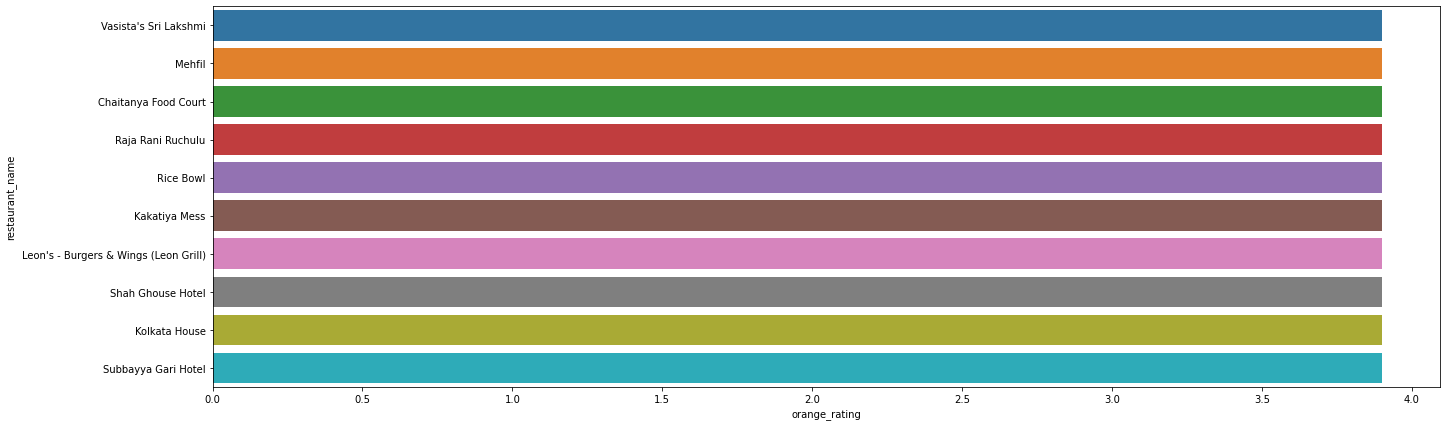

In [62]:
plt.figure(figsize=(22,7))
sns.barplot(x='orange_rating',y='restaurant_name',data=df_1.nlargest(n=10,columns=['orange_rating']),orient='h')
plt.show()

In [63]:
df_1.nsmallest(n=10,columns=['green_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,3.9,350,WELCOME50,50% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,WELCOME50,50% off
2,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",4.0,3.7,300,WELCOME50,50% off
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0,3.9,300,WELCOME50,50% off
5,Rice Bowl,"North Indian, South Indian",4.0,3.9,200,WELCOME50,50% off
6,Lucky Multicuisine Restaurant,"Indian, Chinese, Tandoor",4.0,3.5,300,WELCOME50,50% off
9,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,3.9,300,WELCOME50,50% off
10,Spicy Restaurant,"Biryani, Tandoor, Chinese, North Indian, Desse...",4.0,3.7,300,WELCOME50,50% off
12,Subbayya Gari Hotel,"South Indian, Andhra, Sweets",4.0,3.9,300,WELCOME50,50% off
13,Kritunga Restaurant,"Biryani, Andhra, Rayalaseema, South Indian, No...",4.0,3.8,500,WELCOME50,50% off


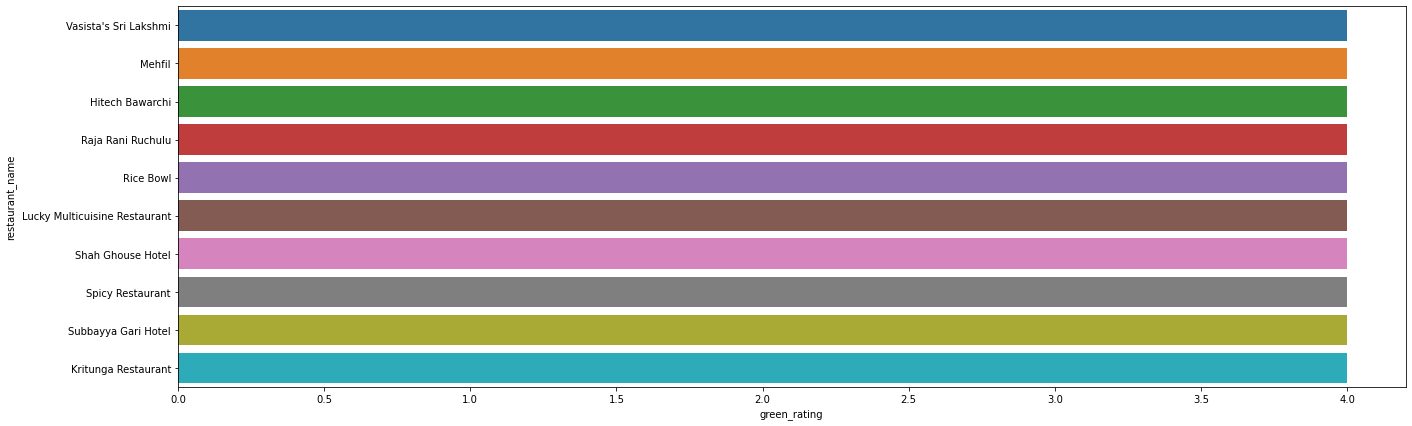

In [64]:
plt.figure(figsize=(22,7))
sns.barplot(x='green_rating',y='restaurant_name',data=df_1.nsmallest(n=10,columns=['green_rating']),orient='h')
plt.show()

In [65]:
df_1.nsmallest(n=10,columns=['orange_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
174,Reddy Gari Ruchulu,"Indian, Andhra, Biryani",4.0,3.0,200,WELCOME50,50% off
241,Vantillu,"Biryani, South Indian",4.0,3.0,300,WELCOME50,50% off
252,THE RS DHABA,"Biryani, Chinese, Indian, Tandoor",4.0,3.0,180,WELCOME50,50% off
295,Haleem Mahal,"Haleem, Sweets",4.0,3.0,200,WELCOME50,50% off
325,Chandni Chowk,"North Indian, Fast Food, Street Food, Sweets, ...",4.0,3.0,150,WELCOME50,50% off
382,Burger It Up,"Burgers, Beverages, Desserts, American, Cafe",4.0,3.0,150,WELCOME50,50% off
56,Taste of Rajasthan,"North Indian, Rajasthani, Chinese, Thalis",4.0,3.1,350,WELCOME50,50% off
277,New Silver Bawarchi Restaurant,"Mughlai, North Indian, Biryani, Haleem",4.0,3.1,400,WELCOME50,50% off
85,Biryaniwala,Indian,4.0,3.2,200,WELCOME50,50% off
238,THE RS DHABA HOTEL,"Biryani, Chinese, North Indian",4.0,3.2,249,WELCOME50,50% off


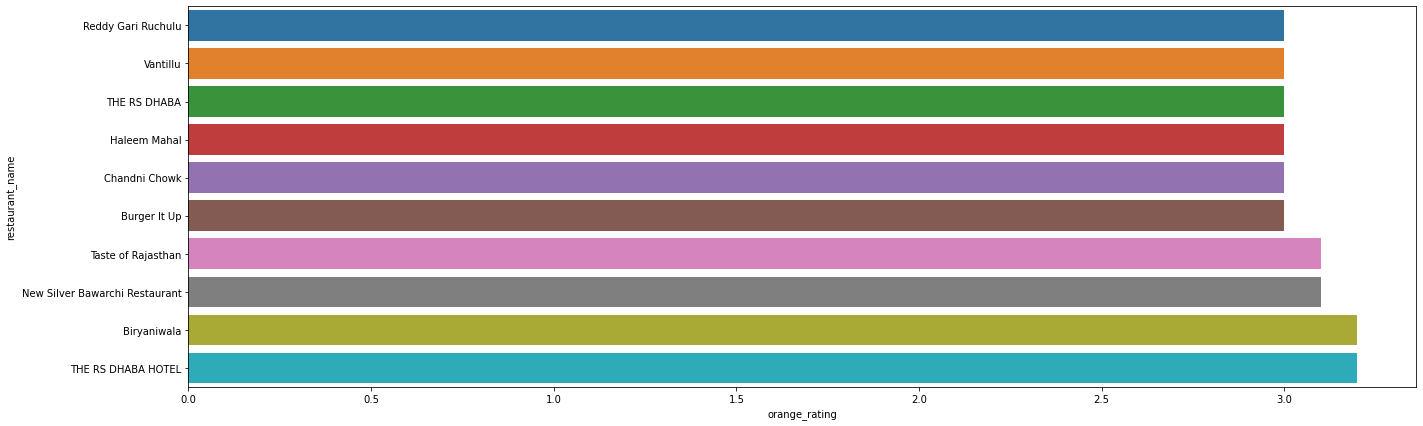

In [66]:
plt.figure(figsize=(22,7))
sns.barplot(x='orange_rating',y='restaurant_name',data=df_1.nsmallest(n=10,columns=['orange_rating']),orient='h')
plt.show()

### Multi Variate Analysis

<AxesSubplot:>

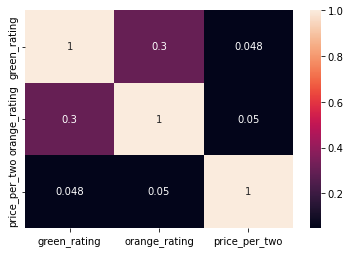

In [67]:
sns.heatmap(data = df_1.corr(),annot=True)

In [68]:
# clean_data=pd.read_csv(r'C:\Users\anuragpc\OneDrive\Desktop\clean_data.csv')
# clean_data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\anuragpc\\OneDrive\\Desktop\\clean_data.csv'

In [ ]:
raw_data=pd.read_csv(r'C:\Users\anuragpc\OneDrive\Desktop\clean_data.csv')
raw_data=raw_data.drop(labels=['Unnamed: 0'],axis=1)
raw_data

In [ ]:
clean_data.coupon_code.value_counts()

In [ ]:
plt.figure(figsize=(22,7))
sns.barplot(data=df_1.nlargest(n=400,columns='green_rating'),y='coupon_code',x='price_per_two',orient='h')

In [82]:
df_1 = df_1.sort_values(by = 'cuisine')

In [94]:
keywords = ['Andhra', 'Bakery']
matches = df_1.loc[df_1.cuisine.apply(lambda x: any(k for k in keywords if k in x))]

In [95]:
matches.head(10)

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
77,Abhiruchi Hotel,"Andhra, Biryani",4.1,3.9,400,WELCOME50,50% off
35,Samskruthi,"Andhra, Biryani",4.0,3.9,250,WELCOME50,50% off
7,Kakatiya Mess,"Andhra, Biryani",4.3,3.9,400,WELCOME50,50% off
233,Ankapur Village Military Hotel,"Andhra, Biryani, Hyderabadi",4.0,3.8,500,WELCOME50,50% off
455,Ankapur Village,"Andhra, Biryani, Hyderabadi",4.0,3.8,300,WELCOME50,50% off
75,Muddapappu Avakaya & More,"Andhra, South Indian, Biryani",4.0,3.7,400,WELCOME50,50% off
157,SRI ANDHRA PULAV.COM,"Andhra, South Indian, Biryani, Chinese",4.0,3.9,300,WELCOME50,50% off
61,Pista House Bakery,Bakery,4.0,3.9,200,WELCOME50,50% off
313,Cakelandia,Bakery,4.1,3.9,100,WELCOME50,50% off
411,Cake Boss,Bakery,4.8,3.9,400,WELCOME50,50% off


In [132]:
idx = df_1.groupby(['cuisine'])['green_rating'].transform(max) == df_1['green_rating']

In [133]:
df_1[idx]

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
327,Diet Zone,"American, Fast Food",4.0,3.9,300,WELCOME50,50% off
193,Pizza House,"American, Fast Food",4.0,3.7,300,WELCOME50,50% off
242,Biggies Burger,"American, Fast Food, Beverages",4.1,3.9,300,WELCOME50,50% off
228,Wow! Chicken By Wow! Momo,"American, Snacks, Beverages, Continental",4.0,3.5,300,TRYNEW,60% off
8,Leon's - Burgers & Wings (Leon Grill),"American, Snacks, Turkish, Portuguese, Contine...",4.2,3.9,300,WELCOME50,50% off
...,...,...,...,...,...,...,...
335,SWEET BASKET,"Sweets, Snacks, Chaat, Beverages, North Indian",4.3,3.9,200,WELCOME50,50% off
383,The Thali Zone,"Thalis, North Indian",4.0,3.6,350,WELCOME50,50% off
201,Wow! China,"Tibetan, Chinese, Asian, Snacks, Continental, ...",4.0,3.7,300,TRYNEW,60% off
163,Wow! Momo,"Tibetan, Healthy Food, Asian, Chinese, Snacks,...",4.1,3.9,300,TRYNEW,60% off
